In [1]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def create_dataset_new(num_obs, num_features, corr = False):
    dataset = []
    
    for features in range(num_features):
        array = []
        correlation_value = 0
        variance = random.randrange(1, 50)
        
        for obs in range(num_obs):
            value = random.randrange(-variance, variance)
            
            if corr == True:
                if value >= 0:
                    correlation_value += 2
                else: 
                    correlation_value -= 2
                value += correlation_value
                array.append(value)
                
            else:
                array.append(value)
                
        dataset.append(array)
        
    dataset = pd.DataFrame(dataset)
    dataset = dataset.T
    return dataset

In [3]:
dataset = create_dataset_new(random.randrange(50,300), random.randrange(6,20), corr = True)

In [4]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,-18.121429,-21.771429,-31.957143,19.635714,10.850000,-1.185714,-13.842857,0.385714,-0.878571,14.992857,10.735714,4.814286
std,26.790277,23.751817,25.721494,14.841227,29.507206,21.452838,29.582046,25.447813,27.711377,22.597350,24.732704,10.502885
min,-71.000000,-75.000000,-75.000000,-10.000000,-50.000000,-43.000000,-84.000000,-55.000000,-57.000000,-35.000000,-39.000000,-14.000000
25%,-41.000000,-41.000000,-55.000000,5.000000,-10.250000,-20.000000,-37.250000,-18.500000,-26.250000,-1.250000,-11.250000,-3.000000
50%,-20.500000,-23.000000,-30.000000,26.000000,11.000000,-1.500000,-15.000000,1.500000,-4.000000,17.000000,13.000000,3.000000
75%,9.000000,-3.000000,-14.000000,31.250000,34.000000,18.000000,5.000000,23.000000,24.000000,33.250000,29.250000,11.250000
max,29.000000,27.000000,41.000000,43.000000,75.000000,39.000000,47.000000,49.000000,52.000000,55.000000,59.000000,35.000000


In [5]:
x = dataset.loc[:, 1:]
y = dataset.loc[:, 0]

In [6]:
model = RandomForestRegressor(max_features = 5)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25)
model.fit(x_train,y_train)

RandomForestRegressor(max_features=5)

In [7]:
results = model.predict(x_test)

In [8]:
mse = mean_squared_error(y_test, results)
r2 = r2_score(y_test, results)

print(mse, r2)

714.9827457142856 -0.17779916988956956


In [9]:
error = y_test - results

<Axes: ylabel='0'>

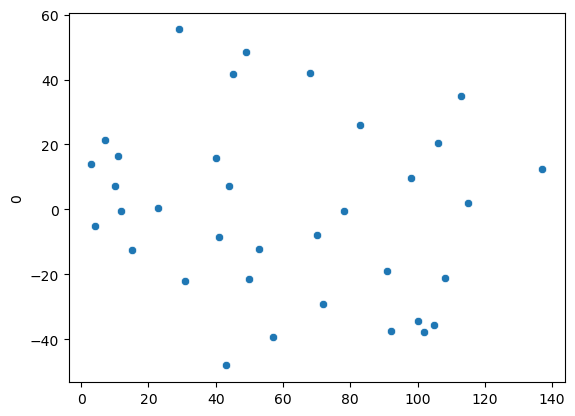

In [10]:
sns.scatterplot(error)